In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pathlib import Path
import string
# Load the data
BASE_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
output_path = os.path.join(BASE_DIR, "output", "crawl_stats.csv")
df = pd.read_csv(output_path)

# Combine 'crawl_start' date with 'timestamp' H:M:S to get a proper datetime object
df['datetime'] = pd.to_datetime(
    df['crawl_start'].str.split(' ').str[0] + ' ' + df['timestamp']
)

df.head()

,timestamp,pages_fetched,pages_total,gone,redir_temp,redir_perm,crawl_start,crawl_end,duration_sec,datetime
0,20:25:42,0,0,0,0,0,2026-01-30 20:25:42.480562,2026-01-30 20:26:44.098840,61.618271,2026-01-30 20:25:42
1,20:25:50,0,1,0,0,0,2026-01-30 20:25:42.480562,2026-01-30 20:26:44.098840,61.618271,2026-01-30 20:25:50
2,20:25:57,1,83,0,0,0,2026-01-30 20:25:42.480562,2026-01-30 20:26:44.098840,61.618271,2026-01-30 20:25:57
3,20:26:04,1,83,0,0,0,2026-01-30 20:25:42.480562,2026-01-30 20:26:44.098840,61.618271,2026-01-30 20:26:04
4,20:26:12,1,83,0,0,0,2026-01-30 20:25:42.480562,2026-01-30 20:26:44.098840,61.618271,2026-01-30 20:26:12


In [29]:
# 1. Fetch Ratio: How much of the discovered frontier have we actually crawled?
df['fetch_ratio'] = df['pages_fetched'] / df['pages_total'].replace(0, 1)

# 2. Crawl Speed: Pages per minute
# diff() calculates the difference between the current and the previous row
df['pages_diff'] = df['pages_fetched'].diff().fillna(0)
df['time_diff_sec'] = df['datetime'].diff().dt.total_seconds().fillna(0)

# Speed = (Change in Pages / Change in Seconds) * 60 seconds
df['pages_per_min'] = (df['pages_diff'] / df['time_diff_sec'].replace(0, 1)) * 60

print("Metrics calculated. Ready for plotting.")

Metrics calculated. Ready for plotting.


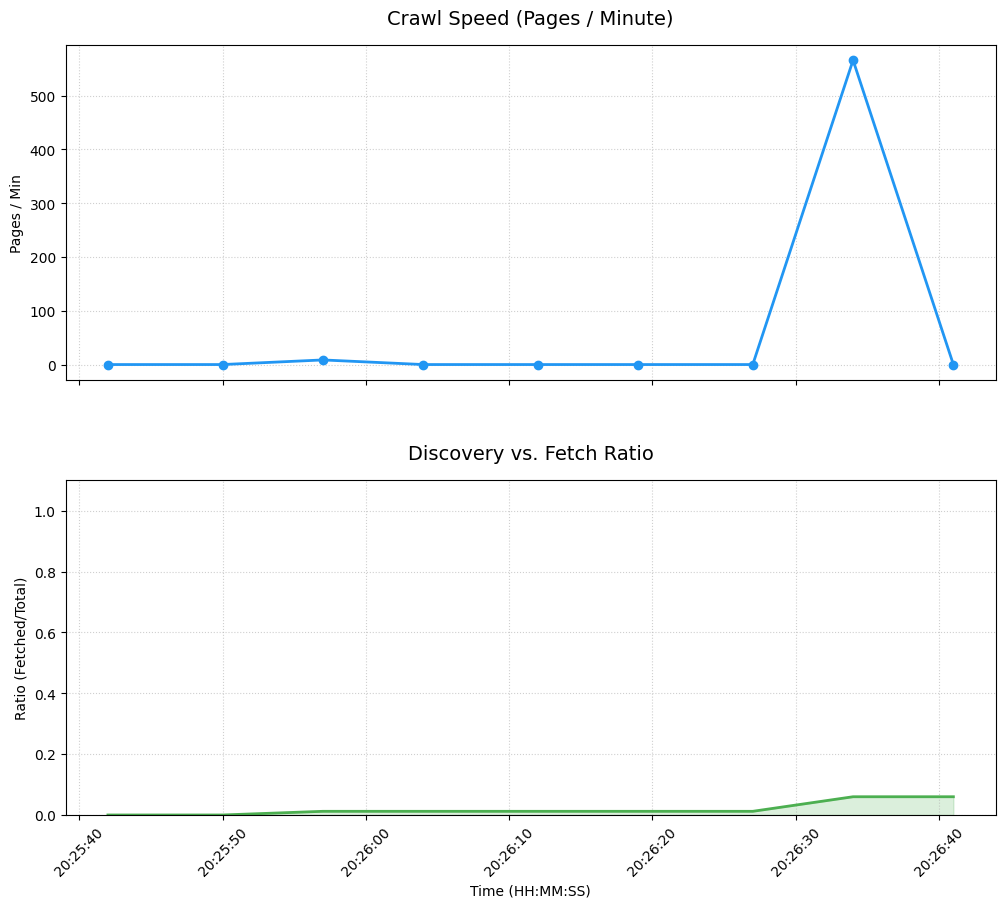

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.3)

# --- Plot 1: Crawl Speed ---
ax1.plot(df['datetime'], df['pages_per_min'], color='#2196F3', marker='o', linewidth=2, label='Speed')
ax1.set_title('Crawl Speed (Pages / Minute)', fontsize=14, pad=15)
ax1.set_ylabel('Pages / Min')
ax1.grid(True, linestyle=':', alpha=0.6)

# --- Plot 2: Fetch Progress ---
ax2.fill_between(df['datetime'], df['fetch_ratio'], color='#4CAF50', alpha=0.2)
ax2.plot(df['datetime'], df['fetch_ratio'], color='#4CAF50', linewidth=2, label='Progress Ratio')
ax2.set_title('Discovery vs. Fetch Ratio', fontsize=14, pad=15)
ax2.set_ylabel('Ratio (Fetched/Total)')
ax2.set_ylim(0, 1.1) # Ratios stay between 0 and 1
ax2.grid(True, linestyle=':', alpha=0.6)

# Formatting the X-axis for readable Time
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.xlabel('Time (HH:MM:SS)')

plt.show()

In [31]:
# Extract final values from the last row of your dataframe
final_row = df.iloc[-1]

summary = {
    "Total Duration (min)": f"{df['duration_sec'].iloc[0] / 60:.2f}",
    "Final Pages Fetched": int(final_row["pages_fetched"]),
    "Final Total URLs": int(final_row["pages_total"]),
    "Final Fetch Ratio": f"{final_row['fetch_ratio']:.2%}",
    "Peak Crawl Speed (p/min)": f"{df['pages_per_min'].max():.2f}",
    "Avg Crawl Speed (p/min)": f"{df['pages_per_min'].mean():.2f}"
}

# Create and display the summary table
summary_df = pd.DataFrame(summary, index=["Session Metrics"])

# Transpose for better readability (Vertical layout)
summary_df.T

,Session Metrics
Total Duration (min),1.03
Final Pages Fetched,67
Final Total URLs,1118
Final Fetch Ratio,5.99%
Peak Crawl Speed (p/min),565.71
Avg Crawl Speed (p/min),63.81


In [34]:
# Keyword extraction
BASE_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
p = Path(os.path.join(BASE_DIR, "output"))
filenames = [entry.name for entry in p.iterdir() if entry.is_file()]
for filename in filenames:
    print(filename)
    if "keywords" in filename:
        output_path = os.path.join(BASE_DIR, "output", f"{filename}")
        key_word_df = pd.read_csv(output_path)

def clean_and_count(text):
    if pd.isna(text): return 0
    # Remove punctuation and split
    text = str(text).translate(str.maketrans('', '', string.punctuation))
    return len(text.split())

# Apply to just the keywords column
key_word_df['keyword_count'] = key_word_df['keywords'].apply(clean_and_count)

# Or apply to the whole row
key_word_df['row_total_keywords'] = key_word_df.astype(str).apply(lambda row: clean_and_count(' '.join(row)), axis=1)


print(f"Total number of keywords: {key_word_df['keyword_count'].sum()}")
key_word_df.head(20)

crawl_stats.csv
part-r-00000_keywords.csv
Total number of keywords: 5898


,link,from_url,keywords,keyword_count,row_total_keywords
0,http://admission.gatech.edu/visit,https://www.gatech.edu/about/visit,Undergraduate Campus Visit Scheduling,4,7
1,http://af.gatech.edu/,https://www.gatech.edu/offices-and-departments,Administration & Finance,2,5
2,http://arc.gatech.edu/,https://www.cc.gatech.edu/research-centers-fra...,Algorithms & Randomness Center,3,6
3,http://arts.gatech.edu/,https://www.gatech.edu/offices-and-departments,"Arts, Office of the (Georgia Tech Arts)",7,10
4,http://atrp.gatech.edu/,https://www.gatech.edu/offices-and-departments,Agricultural Technology Research Program (ATRP),5,8
5,http://cdi.gatech.edu/,https://www.cc.gatech.edu/research-centers-fra...,Center for Deliberate Innovation,4,7
6,http://crnch.gatech.edu/,https://www.cc.gatech.edu/research-centers-fra...,Center for Research into Novel Computing Hiera...,7,10
7,http://gmpg.org/xfn/11,https://sites.gatech.edu/research/,NaN,0,4
8,http://gmpg.org/xfn/11,https://sites.gatech.edu/msgraduation/,NaN,0,4
9,http://gtalumni.org/,https://www.gatech.edu/offices-and-departments,Alumni Association,2,5
